Comparing my methods with Nx build in functions

(34, 78)

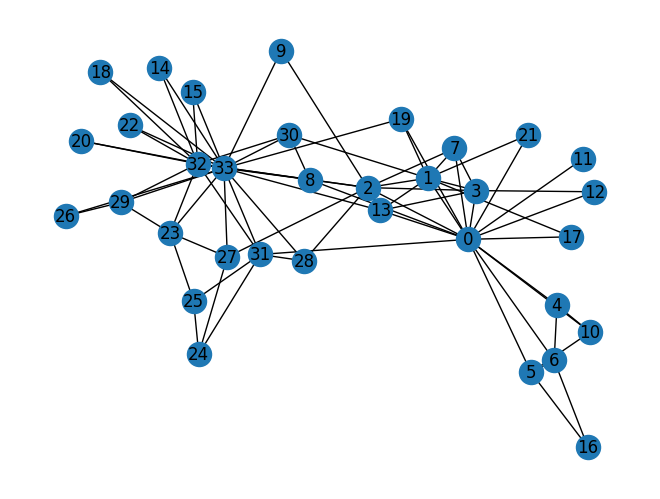

In [1]:
import networkx as nx
# Example Dataset for our tests
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

len(G.nodes), len(G.edges)


Running Girvan-Newman Algorithm...

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 8, 30, 32, 14, 33, 9, 15, 18, 19, 20, 23, 25, 24, 27, 31, 28, 29, 26, 22, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEB

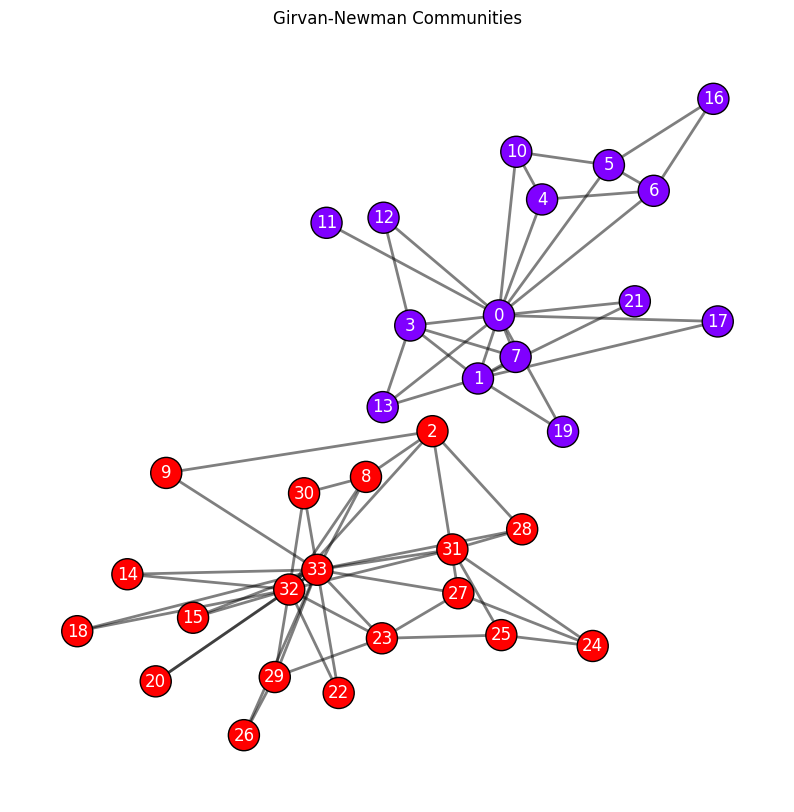

In [3]:
# How our algorithms works
from functions import *
betweenness_method = "dijkstra"  # Options: "bfs", "dijkstra"
component_method = "dfs_recursive"  # Options: "dfs_recursive", "dfs_iterative"

print("\nRunning Girvan-Newman Algorithm...")
communities, removed_edges = Community_detection_algorithms(G, betweenness_method, component_method)

# Visualize Results
visualize_communities(G, communities, removed_edges)


In [ ]:
# --- Testing our custom implementation vs Nx based one ---
from test import Graph, test_algorithms
# --- Run Tests ---
if __name__ == "__main__":
    import networkx as nx

    # Create a test graph
    nx_G = nx.karate_club_graph()
    edges = list(nx_G.edges())
    G = Graph(edges)  # Custom graph

    # Testing different methods
    methods = ["bfs", "dijkstra"]  # Betweenness centrality methods
    component_methods = ["dfs_recursive", "dfs_iterative"]  # Component finding methods

    for betweenness_method in methods:
        for component_method in component_methods:
            test_algorithms(G, betweenness_method, component_method)



 ⚠️--- Testing with Custom Method: bfs | Component Method: dfs_recursive ---

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 3, 7, 1